# Project 2: Ames Housing Dataset
# Helping First Time Homebuyers Predict Home Prices in Ames, IA
---

## Problem Statement

I am a real estate agent currently working with a growing family to help them get a sense of the funds they'll need to purchase a home in Ames, IA. They've outgrown the current apartment they're renting, and with plans to grow their family size, they are eager to move into a larger, functional home in a good neighborhood.

This project aims to predict sale prices of homes in the Ames area given requirements related to those mentioned above, including but not limited to:
* Overall condition
* Neighborhood
* Basement square footage
* Ground living area
* Garage area

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Conclusions](#Conclusions)

<br><br>
## Background

#### Kaggle
The Ames Housing Dataset was created by Dean De Cock to use in data science education ([source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description)).


#### Outside Research
The aim of this project is to focus on information that a growing family would be interested in when looking for a new home. According to Opendoor, some of the most important information families need to consider are house size and layout, location and neighborhood ([source](https://www.opendoor.com/w/blog/what-to-consider-when-buying-a-home-with-kids)). Some factors that Upnest highlighted include a safe and walkable neighborhood, along with yard size and number of rooms ([source](https://www.upnest.com/1/post/13-top-things-home-buyers-with-kids-look-for/)). Most of the aforementioned features can be found in the Ames Housing Dataset.

Many Americans rely on applying for a mortgage to purchase a home ([source](https://www.rocketmortgage.com/learn/what-is-a-mortgage#:~:text=Most%20people%20who%20buy%20a,money%20to%20pay%20it%20off.)). Getting a sense of what a house with their ideal square footage, lot size, etc. may cost can give homebuyers an idea of how much mortgage they should apply for, and if their ideal attributes for a home are even feasible given the amount of mortgage they are approved for.

#### Dataset

The Ames Housing Dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010 ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)).

There are over 80 variables in the dataset covering many aspects of homes in Ames, with 23 nominal, 23 ordinal, 14 discrete, 20 continuous variables, and 2 additional observation identifiers ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

<br><br>
## Data Import and Cleaning

#### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot


In [2]:
df_train = pd.read_csv('../project_data/train.csv', keep_default_na=False, na_values='')
#df_test = pd.read_csv('datasets/test.csv', keep_default_na=False, na_values='')

In [3]:
df_train.columns = df_train.columns.str.replace(' ','_').str.lower()
#df_test.columns = df_test.columns.str.replace(' ','_').str.lower()

<br>

#### Cleaning

**I started off by getting a general sense of the data I'll be working with.**

In [4]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
df_train.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

In [6]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


**Getting a sense of null values in the datasets and what features they are in.**

In [7]:
df_train.isnull().sum().sum()

510

In [8]:
[(column, df_train[column].isnull().sum()) for column in df_train.columns if df_train[column].isnull().any()]

[('lot_frontage', 330),
 ('mas_vnr_type', 22),
 ('mas_vnr_area', 22),
 ('bsmt_qual', 1),
 ('bsmt_cond', 1),
 ('bsmt_exposure', 4),
 ('bsmtfin_type_1', 1),
 ('bsmtfin_sf_1', 1),
 ('bsmtfin_type_2', 2),
 ('bsmtfin_sf_2', 1),
 ('bsmt_unf_sf', 1),
 ('total_bsmt_sf', 1),
 ('bsmt_full_bath', 2),
 ('bsmt_half_bath', 2),
 ('garage_yr_blt', 114),
 ('garage_finish', 1),
 ('garage_cars', 1),
 ('garage_area', 1),
 ('garage_qual', 1),
 ('garage_cond', 1)]

In [9]:
df_train['lot_frontage'].sort_values(ascending=True)

53      21.0
1534    21.0
787     21.0
796     21.0
1834    21.0
        ... 
2016     NaN
2022     NaN
2028     NaN
2031     NaN
2047     NaN
Name: lot_frontage, Length: 2051, dtype: float64

**It looks like every home with lot footage before 21 feet may be entered as Null.**

---
**Moving forward, I will be focusing on the variables that are directly related to livable square footage, building qualities, neighborhood, id, pid and sale price.**

---

In [10]:
sqft =  ['id', 'pid', 'neighborhood', 'bldg_type','house_style',
        'overall_cond', 'mo_sold', 'utilities', 'lot_area', 'totrms_abvgrd',
        'bedroom_abvgr', 'bsmt_full_bath','bsmt_half_bath',
        'full_bath','half_bath', 'bsmtfin_sf_1',
        'bsmtfin_sf_2','total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
        'gr_liv_area', 'garage_area', 'garage_cars','saleprice']

df_train_sqft = df_train[sqft]
df_train_sqft = df_train_sqft.replace({"Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In [11]:
df_train_sqft.dtypes

id                  int64
pid                 int64
neighborhood       object
bldg_type          object
house_style        object
overall_cond        int64
mo_sold             int64
utilities          object
lot_area            int64
totrms_abvgrd       int64
bedroom_abvgr       int64
bsmt_full_bath    float64
bsmt_half_bath    float64
full_bath           int64
half_bath           int64
bsmtfin_sf_1      float64
bsmtfin_sf_2      float64
total_bsmt_sf     float64
1st_flr_sf          int64
2nd_flr_sf          int64
gr_liv_area         int64
garage_area       float64
garage_cars       float64
saleprice           int64
dtype: object

**Getting a sense of null values in the new df_train_sqft dataset I'll be working with.**

In [12]:
[(column, df_train_sqft[column].isnull().sum()) for column in df_train_sqft.columns if df_train_sqft[column].isnull().any()]

[('bsmt_full_bath', 2),
 ('bsmt_half_bath', 2),
 ('bsmtfin_sf_1', 1),
 ('bsmtfin_sf_2', 1),
 ('total_bsmt_sf', 1),
 ('garage_area', 1),
 ('garage_cars', 1)]

In [13]:
df_train_sqft = df_train_sqft.dropna()

**Because there are such full rows with null values, I made the decision to drop them.**

In [14]:
df_train_sqft['indoor_sqft'] = df_train_sqft['gr_liv_area'] + df_train_sqft['total_bsmt_sf'] 
#constructing a new variable reflecting total indoor square feet

df_train_sqft['all_bath'] = df_train_sqft['bsmt_full_bath'] + .5 * df_train_sqft['bsmt_half_bath'] + df_train_sqft['full_bath'] + .5 * df_train_sqft['half_bath']
#constructing a new variable reflecting total bathrooms

**There was an opportunity to construct new features (combining square feet and combining bathrooms) with hopes of providing impactful features for the model.**

In [15]:
df_train_sqft.dtypes #checking the datatypes of newly constructed features

id                  int64
pid                 int64
neighborhood       object
bldg_type          object
house_style        object
overall_cond        int64
mo_sold             int64
utilities          object
lot_area            int64
totrms_abvgrd       int64
bedroom_abvgr       int64
bsmt_full_bath    float64
bsmt_half_bath    float64
full_bath           int64
half_bath           int64
bsmtfin_sf_1      float64
bsmtfin_sf_2      float64
total_bsmt_sf     float64
1st_flr_sf          int64
2nd_flr_sf          int64
gr_liv_area         int64
garage_area       float64
garage_cars       float64
saleprice           int64
indoor_sqft       float64
all_bath          float64
dtype: object

<br>

#### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**id**|*int64*|Ames Housing Dataset|Observation identifier|
|**pid**|*int64*|Ames Housing Dataset|Parcel identification number|
|**neighborhood**|*object*|Ames Housing Dataset|Lot size in square feet|
|**bldg_type**|*object*|Ames Housing Dataset|Lot size in square feet|
|**house_style**|*object*|Ames Housing Dataset|Lot size in square feet|
|**overall_cond**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**mo_sold**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**utilities**|*object*|Ames Housing Dataset|Lot size in square feet|
|**lot_area**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**totrms_abvgrd**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**bedroom_abvgr**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**bsmt_full_bath**|*float64*|Ames Housing Dataset|Lot size in square feet|
|**bsmt_half_bath**|*float64*|Ames Housing Dataset|Lot size in square feet|
|**full_bath**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**half_bath**|*int64*|Ames Housing Dataset|Lot size in square feet|
|**bsmtfin_sf_1**|*float64*|Ames Housing Dataset|Type 1 finished square feet|
|**bsmtfin_sf_2**|*float64*|Ames Housing Dataset|Type 2 finished square feet|
|**total_bsmt_sf**|*float64*|Ames Housing Dataset|Total square feet of basement area|
|**1st_flr_sf**|*int64*|Ames Housing Dataset|First floor square feet|
|**2nd_flr_sf**|*int64*|Ames Housing Dataset|Second floor square feet|
|**gr_liv_area**|*int64*|Ames Housing Dataset|Above grade (ground) living area square feet|
|**garage_area**|*float64*|Ames Housing Dataset|Size of garage in square feet|
|**garage_cars**|*float64*|Ames Housing Dataset|Size of garage in square feet|
|**indoor_sqft**|*float64*|Ames Housing Dataset|Total indoor square footage|
|**all_bath**|*float64*|Ames Housing Dataset|Total indoor square footage|
|**saleprice**|*int64*|Ames Housing Dataset|Sale price of home|

<br><br>
## Exploratory Data Analysis

#### Correlations

In [16]:
df_train_sqft.corr().saleprice.sort_values(ascending=False)

saleprice         1.000000
indoor_sqft       0.779096
gr_liv_area       0.698046
garage_area       0.650000
garage_cars       0.648103
total_bsmt_sf     0.631507
all_bath          0.629483
1st_flr_sf        0.621181
full_bath         0.537369
totrms_abvgrd     0.502909
bsmtfin_sf_1      0.424463
lot_area          0.295121
bsmt_full_bath    0.283564
half_bath         0.282023
2nd_flr_sf        0.249091
bedroom_abvgr     0.135178
mo_sold           0.031868
bsmtfin_sf_2      0.016393
bsmt_half_bath   -0.045378
id               -0.051399
overall_cond     -0.097118
pid              -0.255293
Name: saleprice, dtype: float64

<br>

#### Visualizations

<AxesSubplot:>

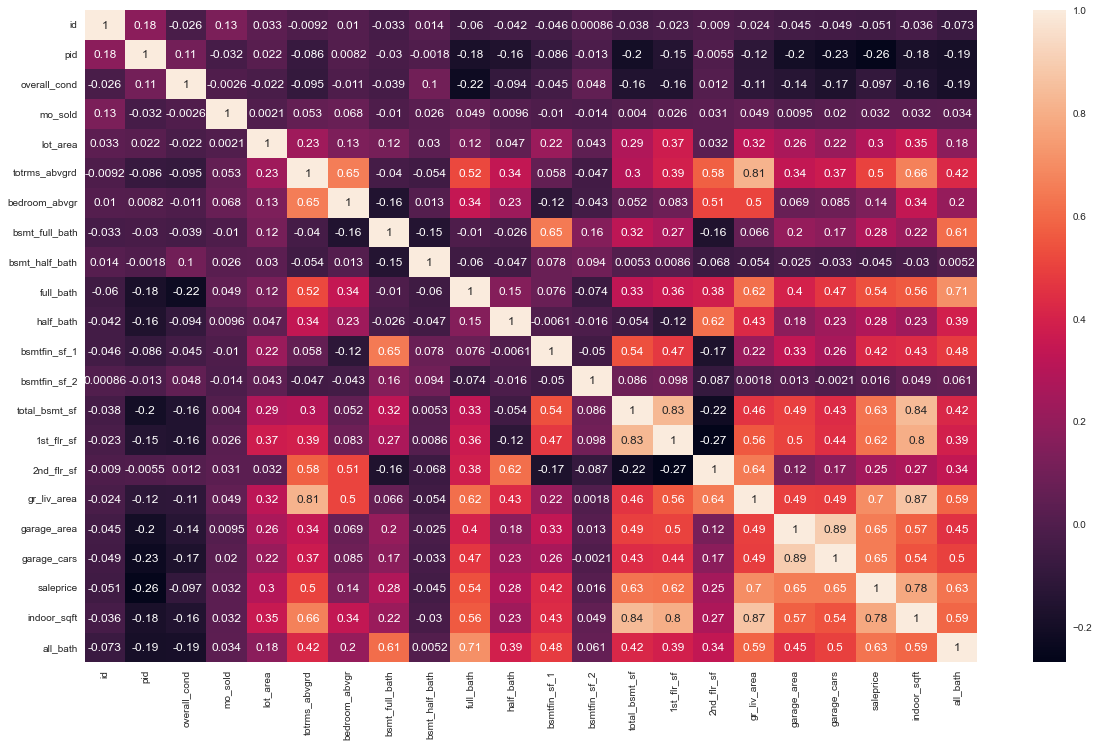

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train_sqft.corr(), annot=True)

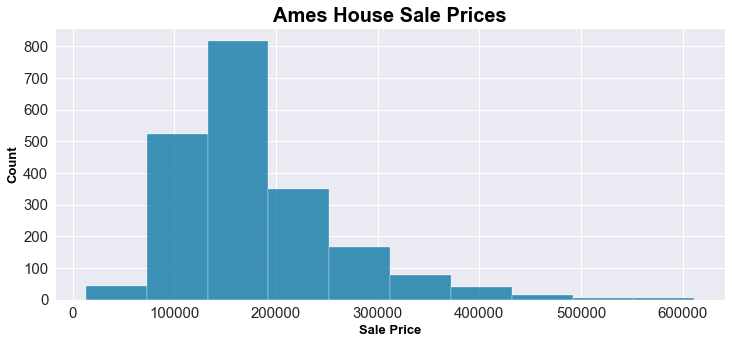

In [18]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
ax = sns.histplot(x='saleprice', data=df_train_sqft, bins=10)

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 20,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Ames House Sale Prices", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sale Price', fontdict2)
plt.ylabel('Count', fontdict2);

<br>

#### Exploring Relationships to the Target Variable

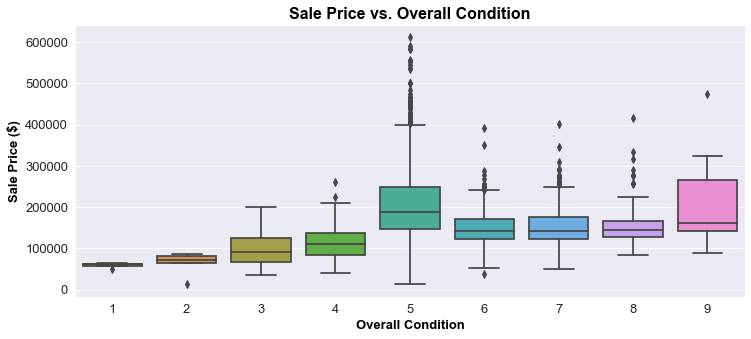

In [19]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df_train_sqft, x="overall_cond", y='saleprice').set(title='Sale Price by Overall Quality')

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Overall Condition', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Overall Condition', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

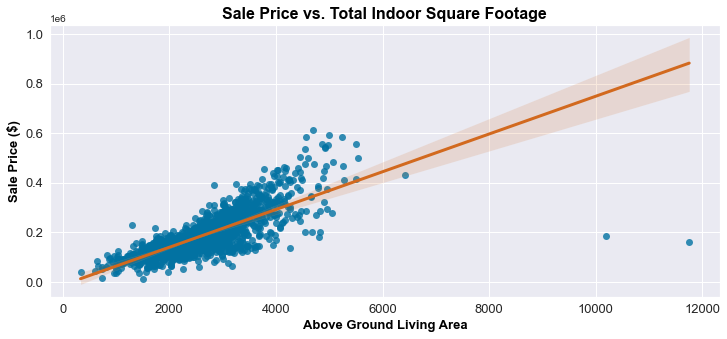

In [20]:
plt.figure(figsize=(12,5))


sns.regplot(x=df_train_sqft['indoor_sqft'],
            y=df_train_sqft['saleprice'], 
            line_kws={'color':'chocolate','alpha':1,'lw':3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Total Indoor Square Footage', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Above Ground Living Area', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

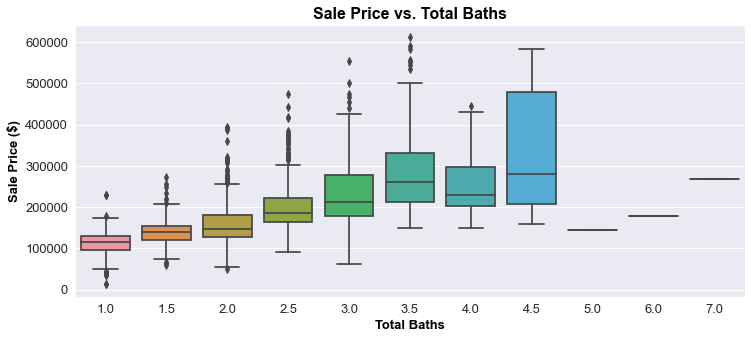

In [21]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df_train_sqft, x="all_bath", y='saleprice')


fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Total Baths', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Total Baths', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

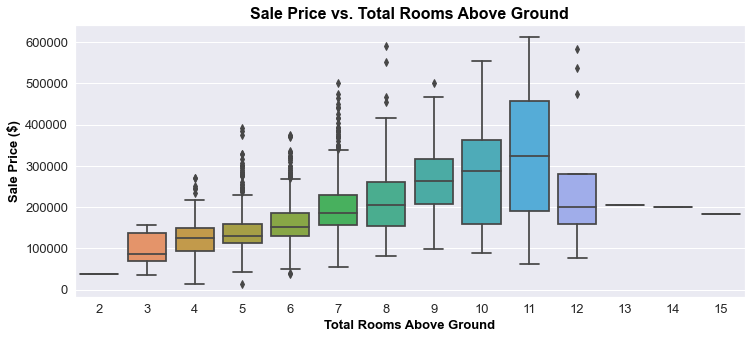

In [22]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df_train_sqft, x="totrms_abvgrd", y='saleprice')

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Total Rooms Above Ground', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Total Rooms Above Ground', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

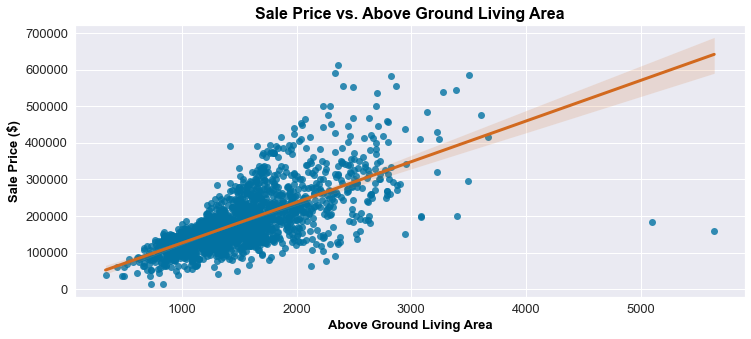

In [23]:
plt.figure(figsize=(12,5))


sns.regplot(x=df_train_sqft['gr_liv_area'],
            y=df_train_sqft['saleprice'], 
            line_kws={'color':'chocolate','alpha':1,'lw':3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Above Ground Living Area', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Above Ground Living Area', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

**Noticing a few outliers above.**

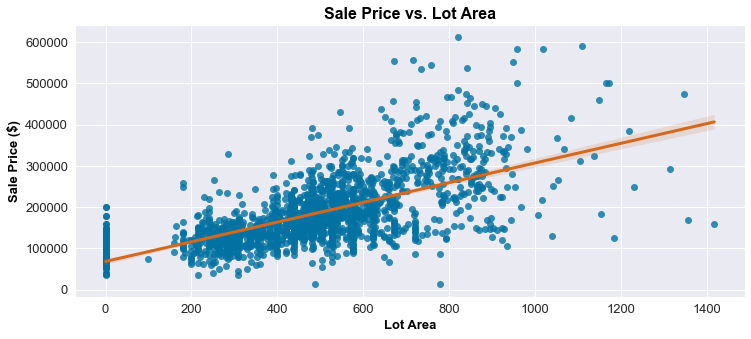

In [24]:
plt.figure(figsize=(12,5))


sns.regplot(x=df_train_sqft['garage_area'],
            y=df_train_sqft['saleprice'], 
            line_kws={'color':'chocolate','alpha':1,'lw':3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Lot Area', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Lot Area', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

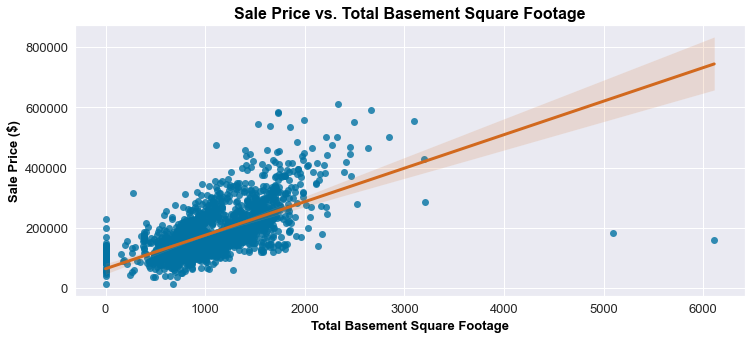

In [25]:
plt.figure(figsize=(12,5))


sns.regplot(x=df_train_sqft['total_bsmt_sf'],
            y=df_train_sqft['saleprice'], 
            line_kws={'color':'chocolate','alpha':1,'lw':3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('Sale Price vs. Total Basement Square Footage', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Total Basement Square Footage', fontdict2)
plt.ylabel('Sale Price ($)', fontdict2);

**Outliers here as well. I'll remove them at the end of the visualizations.**

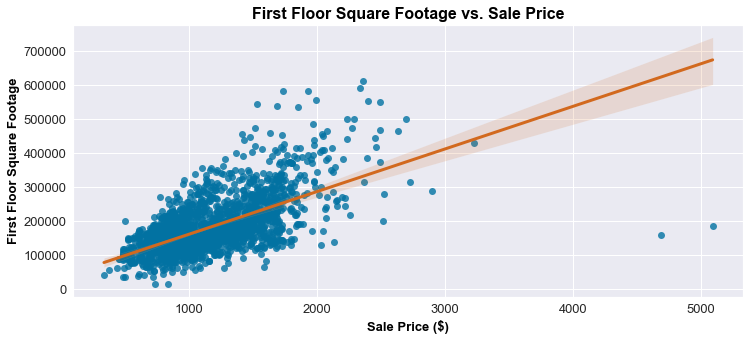

In [26]:
plt.figure(figsize=(12,5))

sns.regplot(x=df_train_sqft['1st_flr_sf'],
            y=df_train_sqft['saleprice'], 
            line_kws={'color':'chocolate','alpha':1,'lw':3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title('First Floor Square Footage vs. Sale Price', loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Sale Price ($)', fontdict2)
plt.ylabel('First Floor Square Footage', fontdict2);

**Outliers noted.**

<br><br>
## Preprocessing and Modeling

<br>

### Preprocessing

#### Handling Outliers

In [27]:
df_train_sqft = df_train_sqft[(df_train_sqft['indoor_sqft'] < 10000) 
                              & (df_train_sqft['gr_liv_area'] < 5000)
                              & (df_train_sqft['total_bsmt_sf'] < 5000)
                              & (df_train_sqft['1st_flr_sf'] < 5000)]

**Removed the outliers found in the above visualizations.**

In [28]:
numeric = [col for col in df_train_sqft._get_numeric_data().columns if col not in ['id', 'pid', 'saleprice']]
categorical = [col for col in df_train_sqft.columns if col not in numeric and col not in ['id', 'pid', 'saleprice']]

**Isolating the numeric and categorical columns to use in StandardScaler and OneHotEncoder.**

In [29]:
print(numeric)

['overall_cond', 'mo_sold', 'lot_area', 'totrms_abvgrd', 'bedroom_abvgr', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'garage_cars', 'indoor_sqft', 'all_bath']


In [30]:
print(categorical)

['neighborhood', 'bldg_type', 'house_style', 'utilities']


<br>

### Modeling

<b>I decided to create pipelines for my models to help organize the steps in my preprocessing/modeling and keep track of changes.

The four models I'll be evaluating are:
* Baseline null model
* Linear Regression
* Lasso
* Ridge

The evaluation matrics I'll be viewing are:
* R2 score
* Mean absolute error
</b>

#### Baseline Null Model

In [31]:
from scipy import stats

In [32]:
X = df_train_sqft.drop(columns = ['id', 'pid', 'saleprice'])
y = df_train_sqft['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 77)

In [33]:
y_baseline_preds = np.full_like(y, y.mean())
y_baseline_preds

array([181493, 181493, 181493, ..., 181493, 181493, 181493])

In [34]:
r2_score(y, y_baseline_preds)

-5.668132629921274e-11

In [35]:
mean_absolute_error(y, y_baseline_preds)

58379.84701857282

#### Linear Regression

In [36]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
X, y = load_concrete()

In [37]:
ctx = ColumnTransformer(
    [('ss', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [38]:
lr_pipe = Pipeline([
    ('ct', ctx),
    ('model', LinearRegression())
])

In [39]:
lr_pipe.fit(X_train, y_train);

In [40]:
list(zip(X_train.columns,lr_pipe['model'].coef_))

[('neighborhood', 7674.418905872441),
 ('bldg_type', -178.25331368807747),
 ('house_style', 3741.6473272346093),
 ('overall_cond', 4736.405575920831),
 ('mo_sold', -8433.43273475072),
 ('utilities', 4.276909892907912e+16),
 ('lot_area', 1.0105421017289768e+16),
 ('totrms_abvgrd', 4.491291169714024e+16),
 ('bedroom_abvgr', 2.055632999898318e+16),
 ('bsmt_full_bath', 10923.0),
 ('bsmt_half_bath', 343.0),
 ('full_bath', -3162806618826526.0),
 ('half_bath', 14086.0),
 ('bsmtfin_sf_1', 15436.0),
 ('bsmtfin_sf_2', -3607874238191829.0),
 ('total_bsmt_sf', 7138.0),
 ('1st_flr_sf', 908.0),
 ('2nd_flr_sf', 5698830171567632.0),
 ('gr_liv_area', -6.608527759332404e+16),
 ('garage_area', 1888979139231494.0),
 ('garage_cars', 1888979139226919.0),
 ('indoor_sqft', 1888979139221531.5),
 ('all_bath', 1888979139190618.0)]

**The coefficients here look exaggerated. Not exactly sure what's going on with these. This is worth investigating further.**

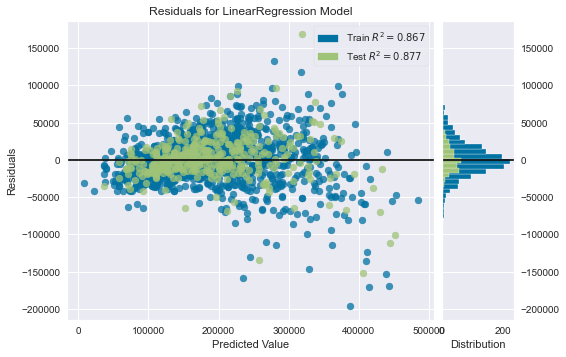

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
visualizer = ResidualsPlot(lr_pipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

In [42]:
lr_pipe.score(X_train, y_train), lr_pipe.score(X_test, y_test)
#R2

(0.8668164557968365, 0.8766082505700993)

In [43]:
mean_absolute_error(y_train, lr_pipe.predict(X_train)), mean_absolute_error(y_test, lr_pipe.predict(X_test))
#MAE

(20088.716381418093, 18501.746341463415)

----

#### Lasso

In [44]:
ctx = ColumnTransformer(
    [('ss', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [45]:
lasso_pipe = Pipeline([
    ('ct', ctx),
    ('lasso', Lasso())
])

lasso_pipe_params = {
    'ct__remainder' : ['passthrough'],
    'ct__ss__with_mean' : [True, False],
}

In [46]:
gs_lasso = GridSearchCV(
    lasso_pipe,
    lasso_pipe_params,
    cv = 5,
    verbose = 2,
    error_score = 'raise'
)

In [47]:
lasso_pipe.fit(X_train, y_train);

/Users/tamarafrances/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.875e+11, tolerance: 1.030e+09
  model = cd_fast.enet_coordinate_descent(


In [48]:
list(zip(X_train.columns,lasso_pipe['lasso'].coef_))

[('neighborhood', 7616.740159311966),
 ('bldg_type', -210.20609816396117),
 ('house_style', 3758.280182100555),
 ('overall_cond', 4689.754429258798),
 ('mo_sold', -8474.051659405806),
 ('utilities', 22181.065201897643),
 ('lot_area', 5988.545544345071),
 ('totrms_abvgrd', 24763.67496644996),
 ('bedroom_abvgr', 13523.927131935821),
 ('bsmt_full_bath', 10915.267372895838),
 ('bsmt_half_bath', 359.5767621456692),
 ('full_bath', 19160.74876348711),
 ('half_bath', 14041.11498692473),
 ('bsmtfin_sf_1', 15417.263552465743),
 ('bsmtfin_sf_2', 23619.77603361518),
 ('total_bsmt_sf', 7190.495262411174),
 ('1st_flr_sf', 872.8942222251006),
 ('2nd_flr_sf', -12163.689884561161),
 ('gr_liv_area', -30873.410579181247),
 ('garage_area', 16992.9410522296),
 ('garage_cars', 12128.751368986668),
 ('indoor_sqft', 6929.335038152326),
 ('all_bath', -23590.913585381644)]

**The coefficients here look much more reasonable than those from the linear regression model.**

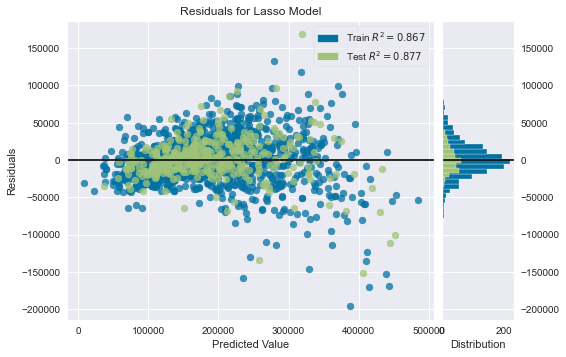

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
visualizer = ResidualsPlot(lasso_pipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [50]:
lasso_pipe.score(X_train, y_train), lasso_pipe.score(X_test, y_test)
#R2

(0.8668138604871779, 0.8765416218137446)

In [51]:
mean_absolute_error(y_train, lasso_pipe.predict(X_train)), mean_absolute_error(y_test, lasso_pipe.predict(X_test))
#MAE

(20095.376265941715, 18510.51047186747)

----

#### Ridge

In [52]:
ctx = ColumnTransformer(
    [('ss', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [53]:
ridge_pipe = Pipeline([
    ('ct', ctx),
    ('rg', Ridge())
])

ridge_pipe_params = {
    'ct__remainder' : ['passthrough'],
    'ct__ss__with_mean' : [True, False],
    'rg__alpha' : [0.1, 1, 10, 100]
}

In [54]:
gs_ridge = GridSearchCV(
    ridge_pipe,
    ridge_pipe_params,
    cv = 5,
    verbose = 2,
    error_score = 'raise'
)

In [55]:
ridge_pipe.fit(X_train, y_train);

In [56]:
list(zip(X_train.columns,ridge_pipe['rg'].coef_))

[('neighborhood', 7527.008035068146),
 ('bldg_type', -87.6452627586766),
 ('house_style', 3776.9566537366563),
 ('overall_cond', 4799.44794054441),
 ('mo_sold', -8711.410854562499),
 ('utilities', 384.27977908717907),
 ('lot_area', 774.6100139559452),
 ('totrms_abvgrd', 2099.186883970849),
 ('bedroom_abvgr', 3249.9344590499463),
 ('bsmt_full_bath', 10914.861197143557),
 ('bsmt_half_bath', 294.6440056429371),
 ('full_bath', 6892.54985467856),
 ('half_bath', 14072.521046277963),
 ('bsmtfin_sf_1', 15189.811131114086),
 ('bsmtfin_sf_2', 9825.13945963675),
 ('total_bsmt_sf', 7278.949562295265),
 ('1st_flr_sf', 945.7020410166408),
 ('2nd_flr_sf', 10045.512521082848),
 ('gr_liv_area', 2804.7151699926153),
 ('garage_area', 12882.55210596074),
 ('garage_cars', 7913.929141374199),
 ('indoor_sqft', 4078.9668030138937),
 ('all_bath', -23384.108102689017)]

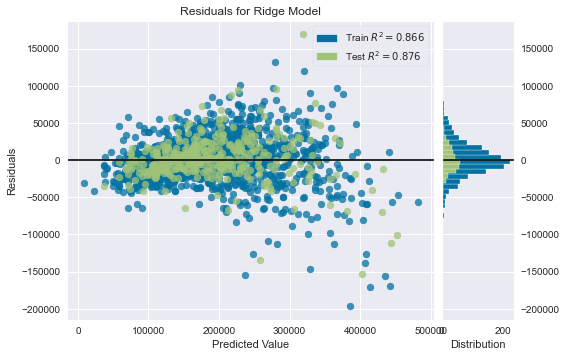

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
visualizer = ResidualsPlot(ridge_pipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [58]:
ridge_pipe.score(X_train, y_train), ridge_pipe.score(X_test, y_test)

(0.8663735709075058, 0.8762825334868573)

In [59]:
mean_absolute_error(y_train, ridge_pipe.predict(X_train)), mean_absolute_error(y_test, ridge_pipe.predict(X_test))

(20162.54085848992, 18489.697496030996)

## Conclusions

#### Prediction Model: Ridge

In [60]:
ridge_pipe.score(X_train, y_train), ridge_pipe.score(X_test, y_test)

(0.8663735709075058, 0.8762825334868573)

In [61]:
mean_absolute_error(y_train, ridge_pipe.predict(X_train)), mean_absolute_error(y_test, ridge_pipe.predict(X_test))

(20162.54085848992, 18489.697496030996)

<br>

#### Interpretation


**The Ridge model had the highest R2 score and lowest mean absolute error (MAE).**
**I was able to build a model that works much better than the null model. In MAE:**
* Null model MAE: 58,380
* Ridge MAE: 18,489
<br><br>


For the Ridge model, 87.6% of the variability in sale price is explained by the features in our model. It generalizes well to unseen data.

The Ridge model was off by an average of about 18,500 dollars in its predictions.

Note: All residuals plots were displaying heteroskedasticity. This is something to investigate further.